In [295]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-military-dataset/Public Data.csv
/kaggle/input/country-military-dataset/Test_Dataset.csv


In [296]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.impute import KNNImputer


In [297]:
df=pd.read_csv("/kaggle/input/country-military-dataset/Public Data.csv")

In [298]:
df.head()

,Unnamed: 0,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,1,Afghanistan,2022,Developing,59.73,271.0,62,-0.25,73.83,59.0,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,2,Afghanistan,2021,Developing,60.50,268.0,66,-0.67,73.66,71.0,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,3,Afghanistan,2020,Developing,60.09,271.0,70,-0.17,77.76,65.0,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,4,Afghanistan,2019,Developing,58.88,279.0,70,0.69,6.95,72.0,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,5,Afghanistan,2018,Developing,59.26,272.0,74,0.07,79.82,70.0,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14


In [299]:
df=df.drop(df.columns[[0]],axis=1)

In [300]:
df.columns

Index(['Country', 'Year', 'Status', 'Power Level', 'Civilian Deaths',
       'Military Accidents', 'Substance Abuse', 'Military Investment',
       'Air Force', 'Army', 'Intelligence', 'Navy', 'Submarines',
       'Educational Investment', 'Literacy', 'Revolts', 'GDP', 'Population',
       'Offense', 'Defense', 'Political Stability',
       'International Reputation'],
      dtype='object')

In [301]:
df.head(30)

,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,Army,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,Afghanistan,2022,Developing,59.73,271.0,62,-0.25,73.83,59.0,495,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,Afghanistan,2021,Developing,60.50,268.0,66,-0.67,73.66,71.0,431,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,Afghanistan,2020,Developing,60.09,271.0,70,-0.17,77.76,65.0,2788,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,Afghanistan,2019,Developing,58.88,279.0,70,0.69,6.95,72.0,3014,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,Afghanistan,2018,Developing,59.26,272.0,74,0.07,79.82,70.0,1988,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14
5,Afghanistan,2017,Developing,58.80,277.0,74,0.33,56.76,63.0,2860,...,59.0,9.19,64.0,0.39,445.83,284326.0,18.19,18.44,-0.17,8.76
6,Afghanistan,2016,Developing,58.50,283.0,80,0.80,25.99,65.0,1600,...,64.0,8.42,66.0,0.74,372.62,2729431.0,19.85,19.22,0.31,7.95
7,Afghanistan,2015,Developing,57.64,297.0,89,0.71,11.24,63.0,1143,...,64.0,7.12,62.0,0.41,369.92,26616795.0,18.41,19.54,0.58,7.86
8,Afghanistan,2014,Developing,58.01,299.0,84,-1.30,16.92,60.0,1989,...,64.0,6.93,60.0,0.35,273.08,2589343.0,20.09,19.70,0.30,8.44
9,Afghanistan,2013,Developing,57.62,287.0,86,-0.22,2.72,66.0,1295,...,57.0,8.87,57.0,1.28,25.23,257795.0,18.46,18.70,0.07,7.81


In [302]:
p=df['Country'].unique()

In [303]:
p=pd.DataFrame(p)

In [304]:
p.shape

(193, 1)

In [305]:
df.isnull().sum()

Country                       0
Year                          0
Status                        0
Power Level                  10
Civilian Deaths              10
Military Accidents            0
Substance Abuse              17
Military Investment           0
Air Force                   544
Army                          0
Intelligence                 32
Navy                          0
Submarines                   19
Educational Investment       45
Literacy                     19
Revolts                       0
GDP                         419
Population                  611
Offense                      32
Defense                      32
Political Stability         157
International Reputation    153
dtype: int64

In [306]:
df.dtypes

Country                      object
Year                          int64
Status                       object
Power Level                 float64
Civilian Deaths             float64
Military Accidents            int64
Substance Abuse             float64
Military Investment         float64
Air Force                   float64
Army                          int64
Intelligence                float64
Navy                          int64
Submarines                  float64
Educational Investment      float64
Literacy                    float64
Revolts                     float64
GDP                         float64
Population                  float64
Offense                     float64
Defense                     float64
Political Stability         float64
International Reputation    float64
dtype: object

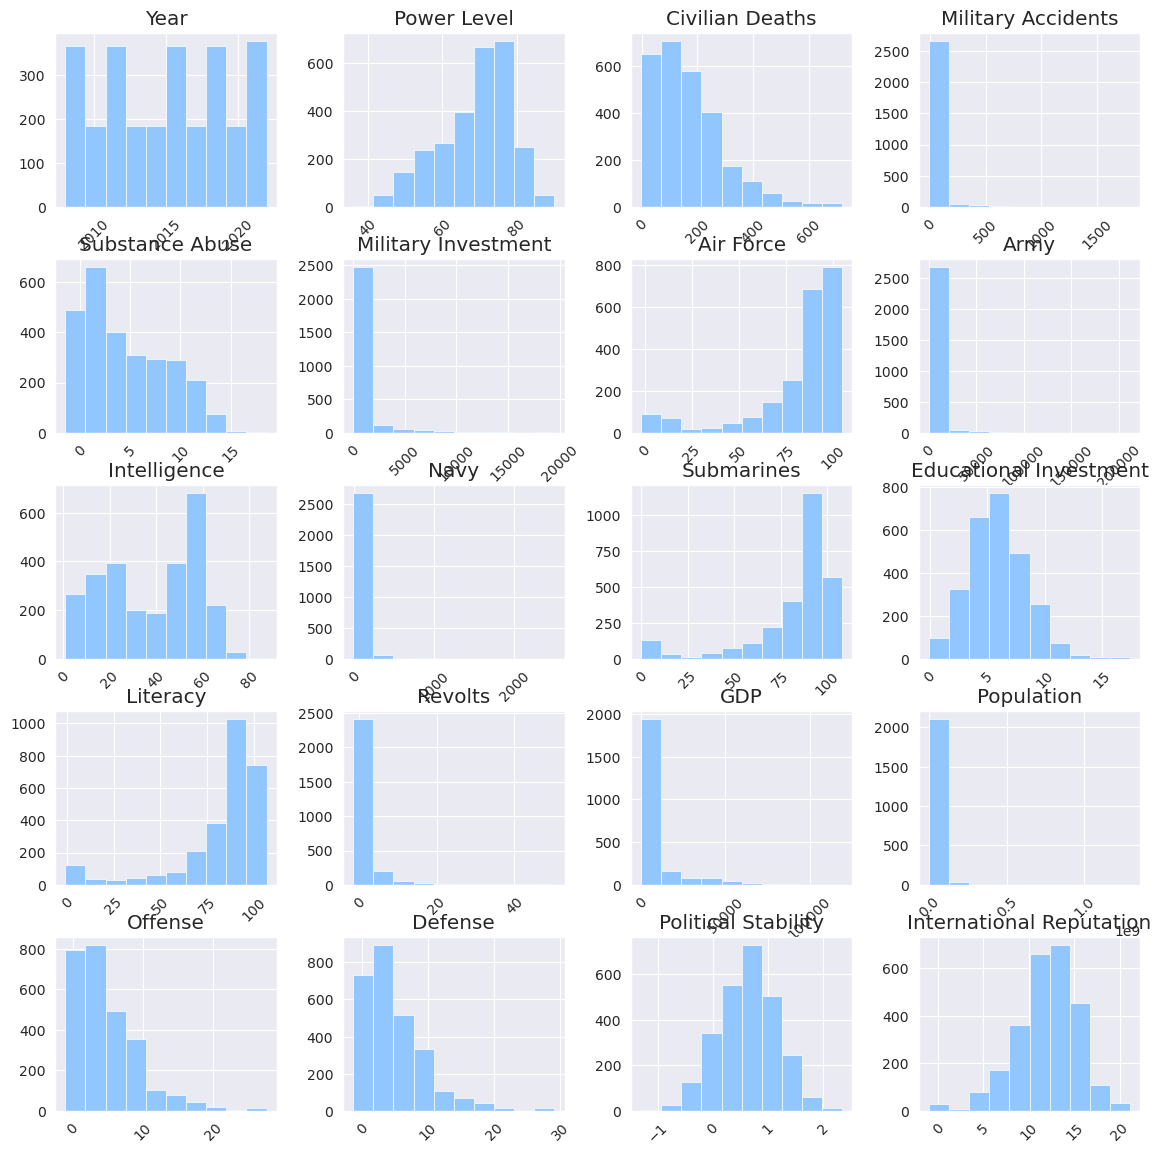

In [307]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

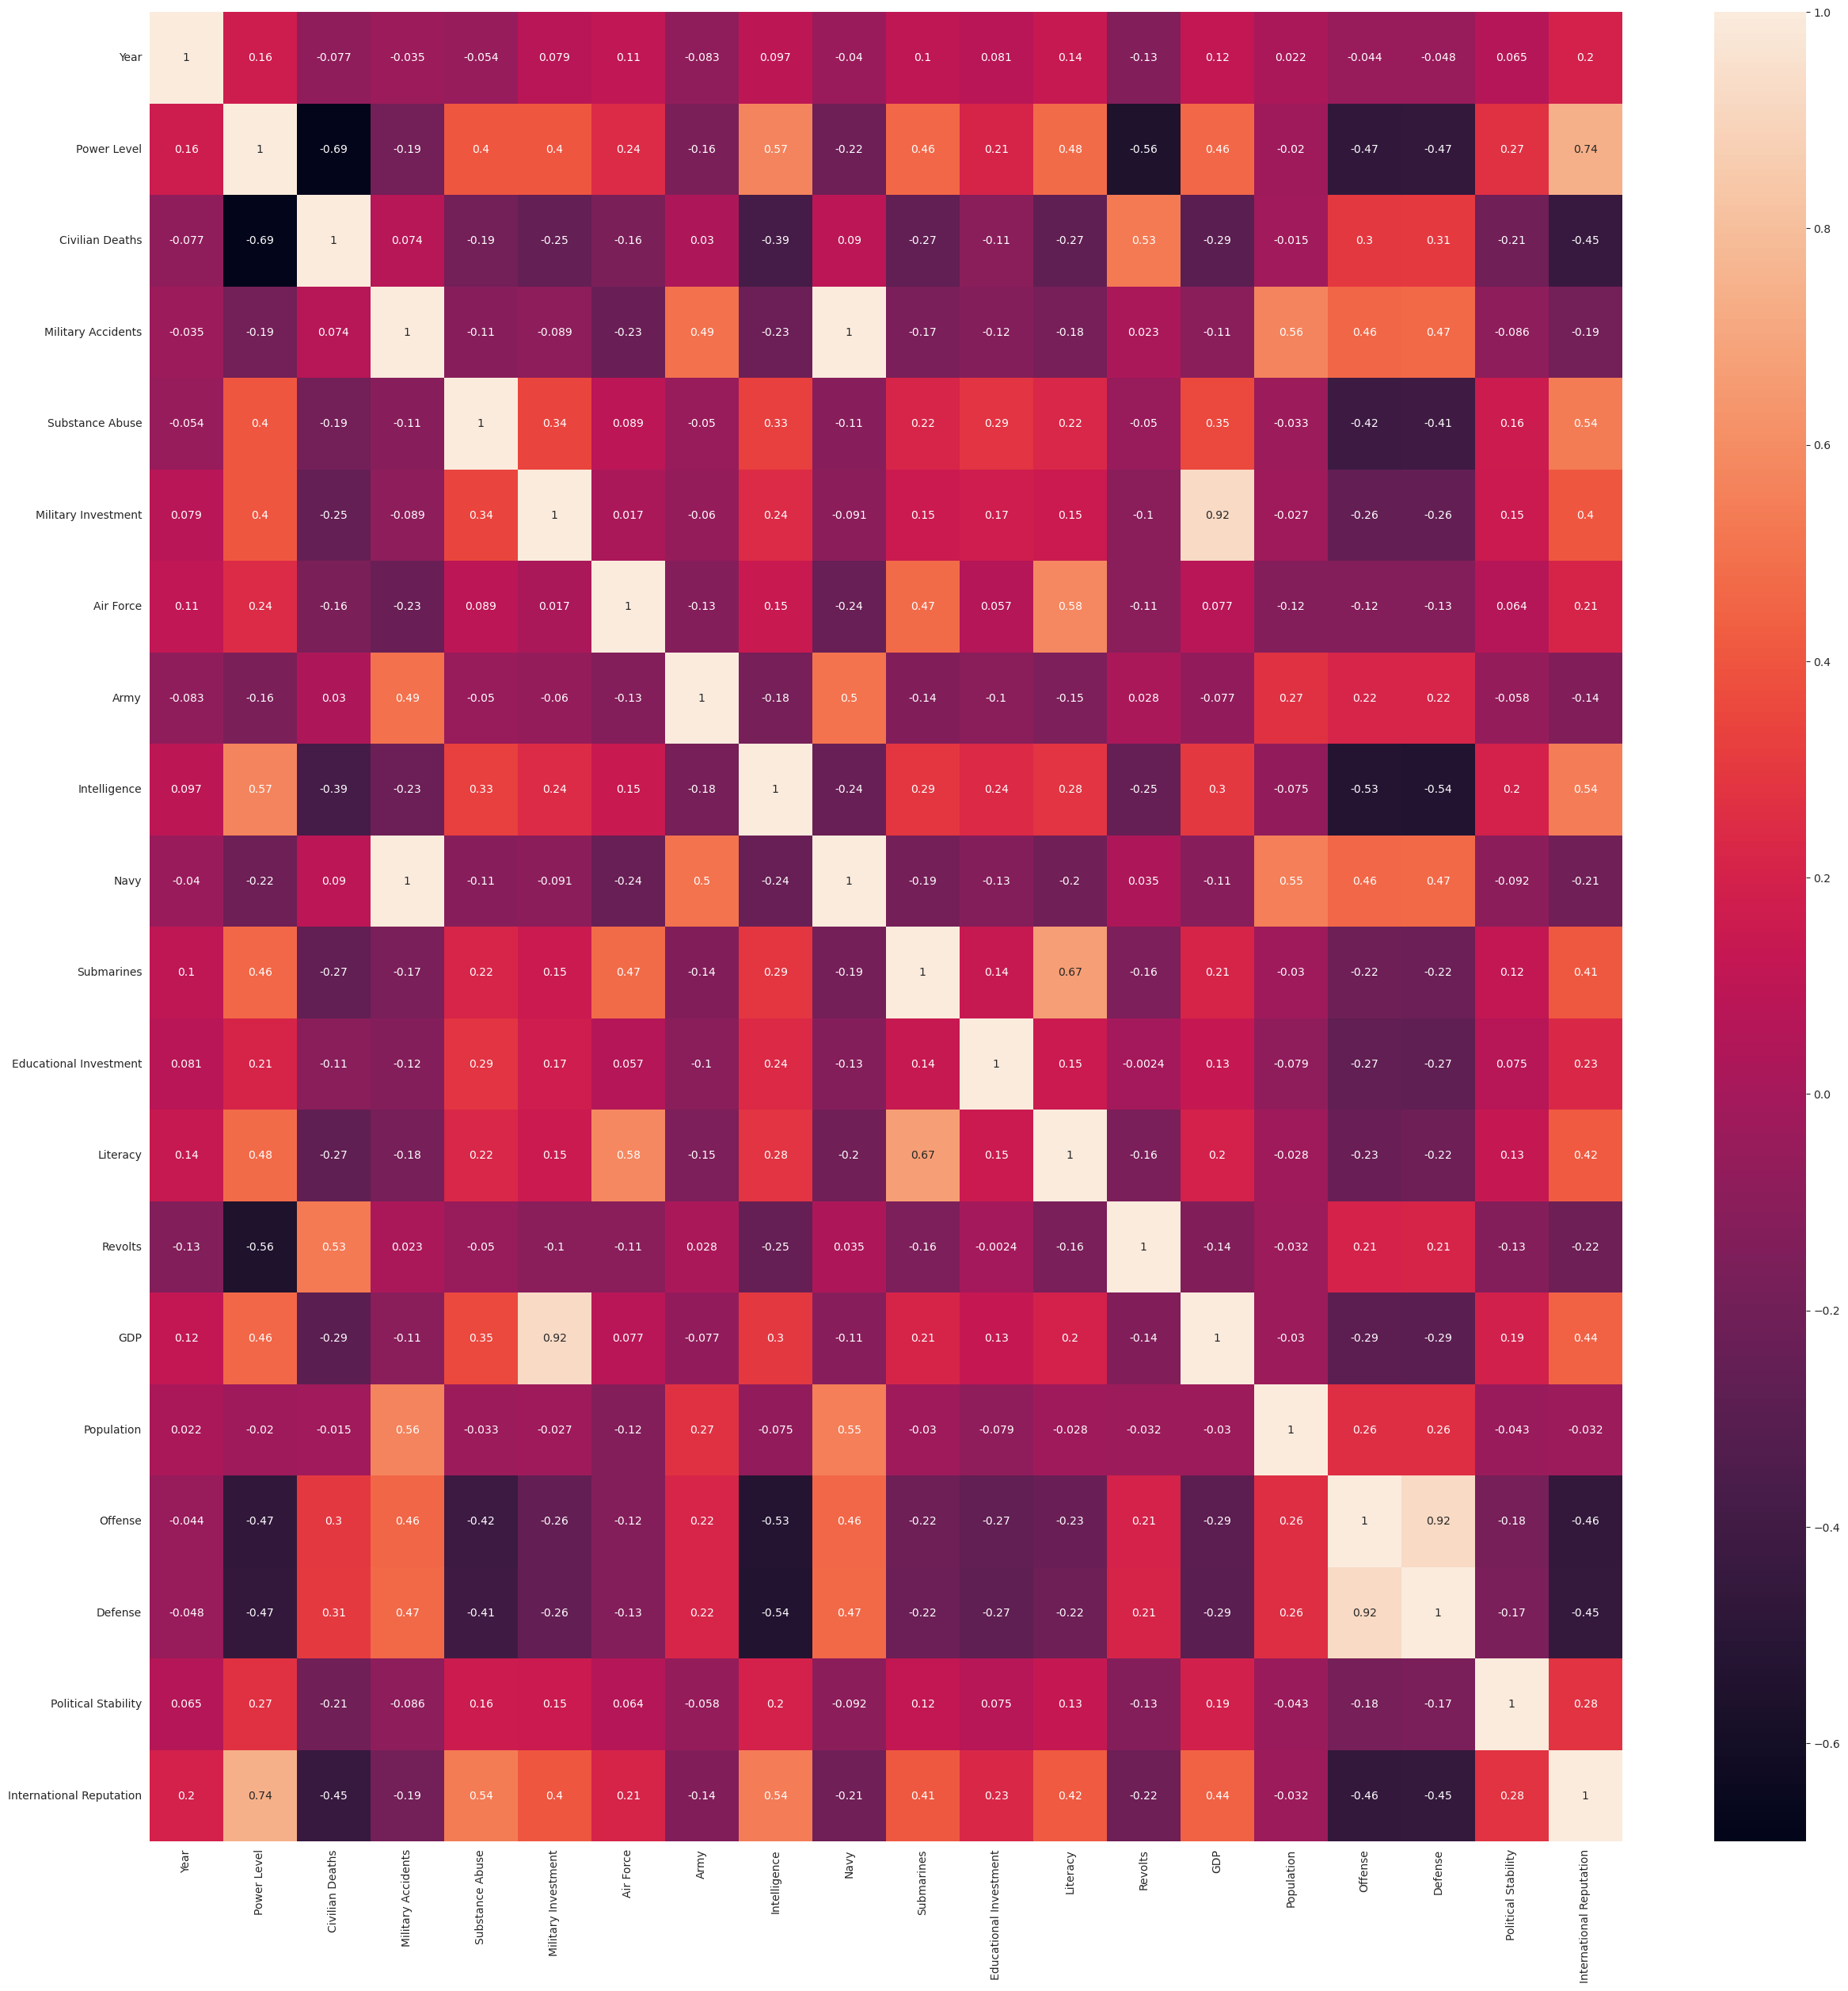

In [308]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [309]:
num_cols = ['Power Level', 'Civilian Deaths',
       'Military Accidents', 'Substance Abuse', 'Military Investment',
       'Air Force', 'Army', 'Intelligence', 'Navy', 'Submarines',
       'Educational Investment', 'Literacy', 'Revolts', 'GDP', 'Population',
       'Offense', 'Defense', 'Political Stability', 'International Reputation']

num_data = df[num_cols]

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
num_data_imputed = imputer.fit_transform(num_data)

df[num_cols] = num_data_imputed

In [310]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Power Level                 0
Civilian Deaths             0
Military Accidents          0
Substance Abuse             0
Military Investment         0
Air Force                   0
Army                        0
Intelligence                0
Navy                        0
Submarines                  0
Educational Investment      0
Literacy                    0
Revolts                     0
GDP                         0
Population                  0
Offense                     0
Defense                     0
Political Stability         0
International Reputation    0
dtype: int64

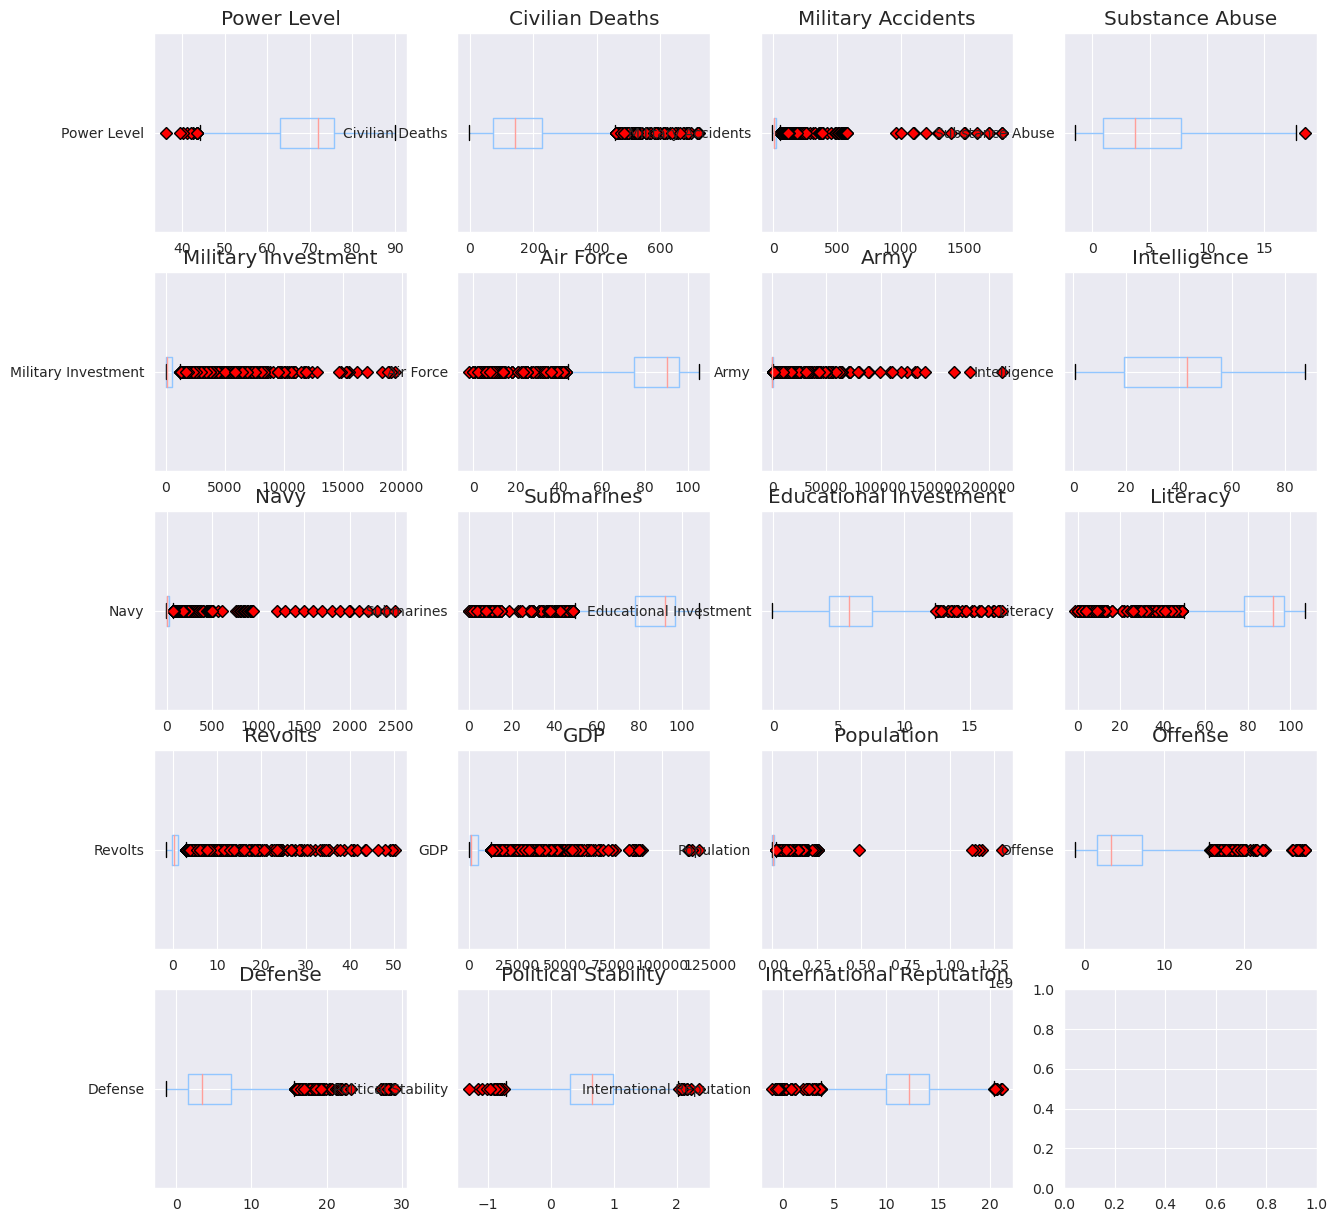

In [311]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(df[num_cols]):
    bp = df.boxplot(column=col, ax=axes[i], vert=False, flierprops=dict(markerfacecolor='r', marker='D'))
    bp.set_title(col)

# Show the plot
plt.show()






In [312]:
df.columns

Index(['Country', 'Year', 'Status', 'Power Level', 'Civilian Deaths',
       'Military Accidents', 'Substance Abuse', 'Military Investment',
       'Air Force', 'Army', 'Intelligence', 'Navy', 'Submarines',
       'Educational Investment', 'Literacy', 'Revolts', 'GDP', 'Population',
       'Offense', 'Defense', 'Political Stability',
       'International Reputation'],
      dtype='object')

In [313]:
num_cols

['Power Level',
 'Civilian Deaths',
 'Military Accidents',
 'Substance Abuse',
 'Military Investment',
 'Air Force',
 'Army',
 'Intelligence',
 'Navy',
 'Submarines',
 'Educational Investment',
 'Literacy',
 'Revolts',
 'GDP',
 'Population',
 'Offense',
 'Defense',
 'Political Stability',
 'International Reputation']

In [314]:
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    for col in num_cols:
        mean_val = country_data[col].mean()
        for i in country_data.index:
            if country_data.at[i, col] < 0.2 * mean_val:
                country_data.at[i, col] = mean_val
    df[df['Country'] == country] = country_data

In [315]:
df.head(30)

,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,Army,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,Afghanistan,2022,Developing,59.73,271.000000,62.000000,-0.049333,73.830000,59.0,495.0,...,58.000000,8.06,62.000000,0.172667,612.860000,8.387976e+06,17.160000,17.680000,0.440000,10.57
1,Afghanistan,2021,Developing,60.50,268.000000,66.000000,-0.049333,73.660000,71.0,2443.8,...,60.000000,8.08,65.000000,0.172667,631.580000,3.173169e+07,18.280000,17.850000,0.720000,10.40
2,Afghanistan,2020,Developing,60.09,271.000000,70.000000,-0.049333,77.760000,65.0,2788.0,...,65.000000,8.71,70.000000,0.172667,669.500000,3.696953e+06,16.850000,18.460000,0.990000,9.52
3,Afghanistan,2019,Developing,58.88,279.000000,70.000000,0.690000,6.950000,72.0,3014.0,...,65.000000,8.34,72.000000,0.172667,323.710667,2.978596e+06,17.720000,18.110000,0.840000,9.82
4,Afghanistan,2018,Developing,59.26,272.000000,74.000000,0.070000,79.820000,70.0,1988.0,...,67.000000,9.40,66.000000,0.172667,553.890000,2.883166e+06,18.910000,18.760000,0.520000,9.14
5,Afghanistan,2017,Developing,58.80,277.000000,74.000000,0.330000,56.760000,63.0,2860.0,...,59.000000,9.19,64.000000,0.390000,445.830000,8.387976e+06,18.190000,18.440000,0.688000,8.76
6,Afghanistan,2016,Developing,58.50,283.000000,80.000000,0.800000,25.990000,65.0,1600.0,...,64.000000,8.42,66.000000,0.740000,372.620000,2.729431e+06,19.850000,19.220000,0.310000,7.95
7,Afghanistan,2015,Developing,57.64,297.000000,89.000000,0.710000,11.240000,63.0,1143.0,...,64.000000,7.12,62.000000,0.410000,369.920000,2.661680e+07,18.410000,19.540000,0.580000,7.86
8,Afghanistan,2014,Developing,58.01,299.000000,84.000000,-0.049333,16.920000,60.0,1989.0,...,64.000000,6.93,60.000000,0.350000,273.080000,2.589343e+06,20.090000,19.700000,0.300000,8.44
9,Afghanistan,2013,Developing,57.62,287.000000,86.000000,-0.049333,32.619333,66.0,1295.0,...,57.000000,8.87,57.000000,1.280000,323.710667,8.387976e+06,18.460000,18.700000,0.688000,7.81


In [316]:
q=(df['Civilian Deaths']/df['Population'])*100

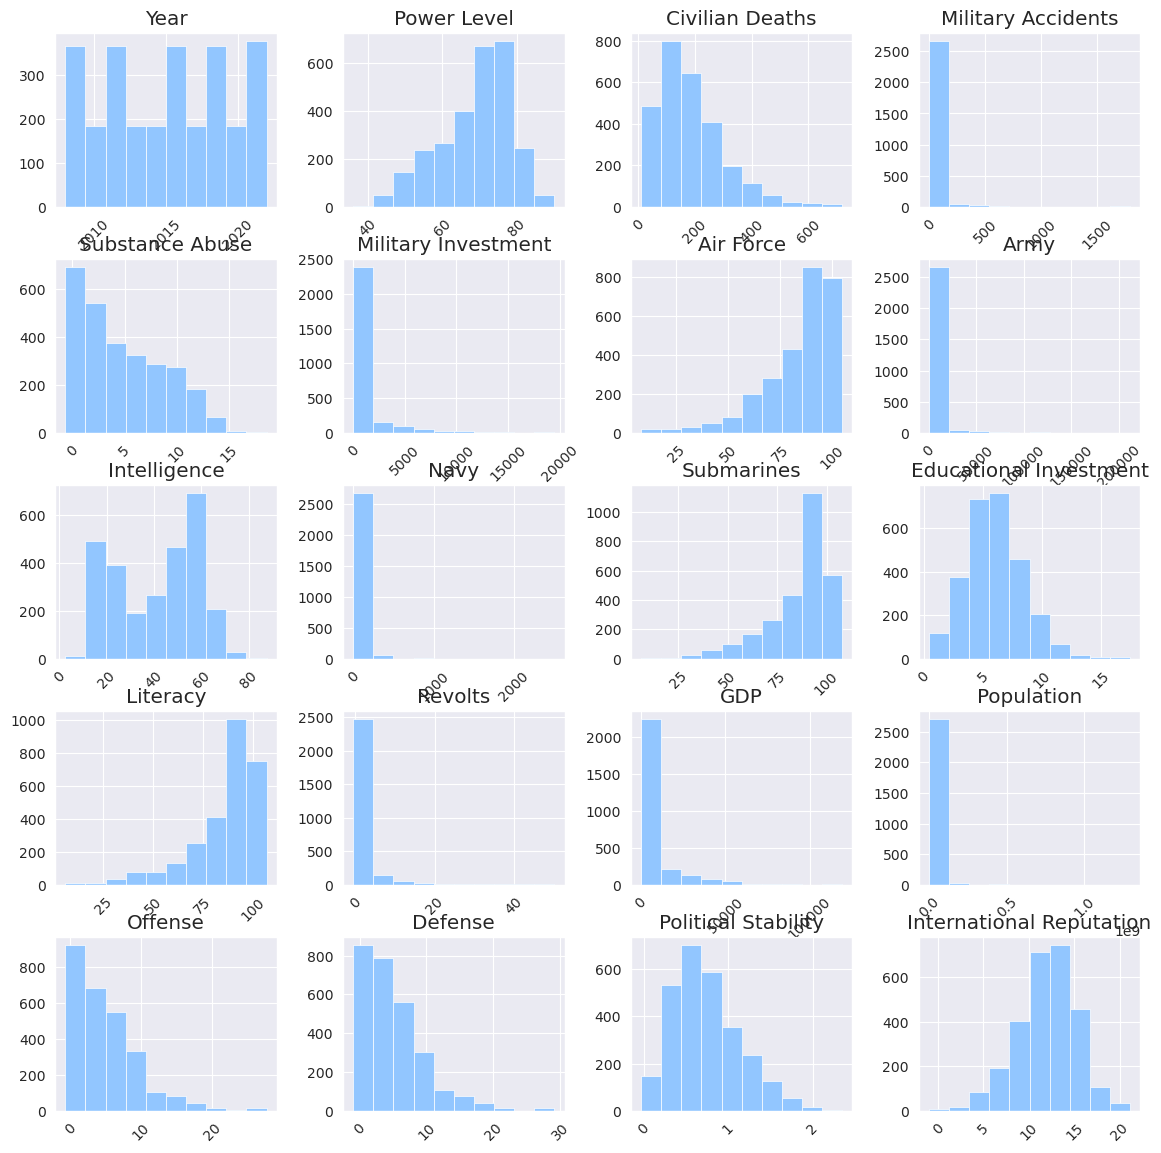

In [317]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

In [318]:
df=df.drop(['Military Investment','Offense','Military Accidents'],axis=1)

In [319]:
df=df.drop(['Literacy'],axis=1)

In [320]:
df=df.drop(['Air Force'],axis=1)

In [321]:
df=df.drop(['Educational Investment'],axis=1)

In [322]:
df=df.drop(['Submarines'],axis=1)

In [323]:
f_cols={'Civilian Deaths',
 'Army',
 'Navy',
 'Revolts',
 'GDP',
 'Population',
 'Defense',
 'Political Stability',
 'International Reputation',
      

       }

In [324]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df[f_cols].columns

In [325]:

vif_data["VIF"] = [variance_inflation_factor(df[f_cols].values, i)
                          for i in range(len(f_cols))]

In [326]:
vif_data

,feature,VIF
0,Civilian Deaths,5.761412
1,Army,1.532685
2,GDP,1.853030
3,Revolts,1.937721
4,Political Stability,4.928931
5,International Reputation,7.517210
6,Population,2.037003
7,Navy,2.956936
8,Defense,3.379546


In [327]:
df.columns

Index(['Country', 'Year', 'Status', 'Power Level', 'Civilian Deaths',
       'Substance Abuse', 'Army', 'Intelligence', 'Navy', 'Revolts', 'GDP',
       'Population', 'Defense', 'Political Stability',
       'International Reputation'],
      dtype='object')

In [328]:
d_col={'Power Level', 'Civilian Deaths',
       'Substance Abuse', 'Army', 'Navy', 'Revolts', 'GDP', 'Population',
       'Defense', 'Political Stability', 'International Reputation'}

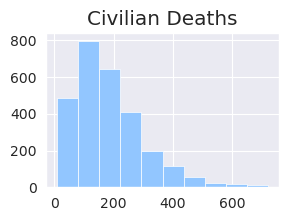

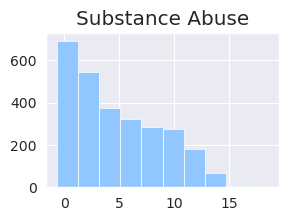

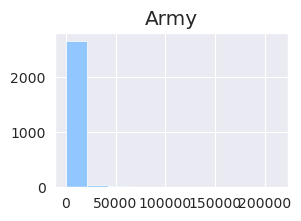

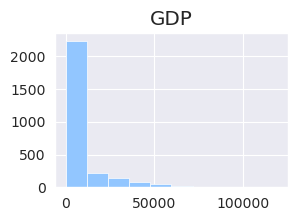

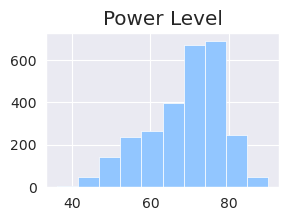

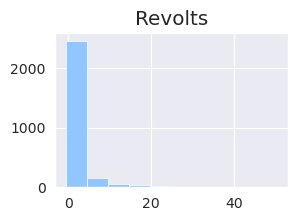

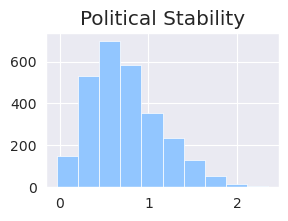

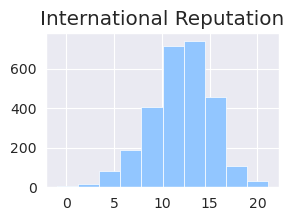

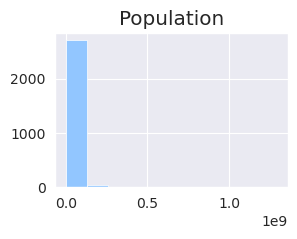

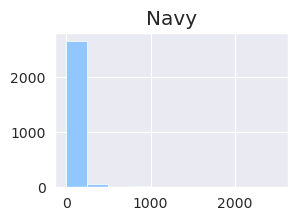

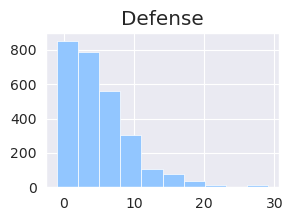

In [329]:
for col in d_col:
    plt.figure(figsize=(3, 2))
    plt.hist(df[col], bins=10)
    plt.title(col)
    plt.show()

In [330]:
for cols in {'Civilian Deaths','Substance Abuse','Defense','Power Level','Political Stability'}:
    df[cols]=np.log1p(df[cols])

In [331]:
df["Status"] = np.where(df["Status"] == "Developing", 0, 1)


In [332]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [333]:
df.columns

Index(['Country', 'Year', 'Status', 'Power Level', 'Civilian Deaths',
       'Substance Abuse', 'Army', 'Intelligence', 'Navy', 'Revolts', 'GDP',
       'Population', 'Defense', 'Political Stability',
       'International Reputation'],
      dtype='object')

In [334]:
s_col={'Civilian Deaths',
       'Substance Abuse', 'Army', 'Navy', 'Revolts', 'GDP', 'Population',
       'Defense', 'Political Stability', 'International Reputation'}

In [335]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[s_col])
scaled=pd.DataFrame(scaled,columns=df[s_col].columns)

In [336]:
scaled.head(30)

,Civilian Deaths,Substance Abuse,Army,GDP,Revolts,Political Stability,International Reputation,Population,Navy,Defense
0,0.771881,0.253673,0.002352,0.004707,0.014984,0.318780,0.522820,0.006483,0.034731,0.925317
1,0.769289,0.253673,0.011536,0.004864,0.014984,0.462139,0.515138,0.024525,0.039122,0.926732
2,0.771881,0.253673,0.013158,0.005182,0.014984,0.579783,0.475373,0.002857,0.037126,0.931707
3,0.778654,0.395611,0.014224,0.002279,0.014984,0.516552,0.488929,0.002302,0.042715,0.928872
4,0.772738,0.282847,0.009388,0.004212,0.014984,0.362403,0.458202,0.002228,0.042315,0.934097
5,0.776979,0.336512,0.013498,0.003305,0.019253,0.446986,0.441030,0.006483,0.044311,0.931546
6,0.781969,0.411168,0.007560,0.002690,0.026130,0.242441,0.404428,0.002109,0.047904,0.937692
7,0.793213,0.398514,0.005406,0.002667,0.019646,0.393639,0.400362,0.020571,0.046707,0.940145
8,0.794776,0.253673,0.009393,0.001854,0.018468,0.236259,0.426570,0.002001,0.049102,0.941357
9,0.785237,0.253673,0.006122,0.002279,0.036739,0.446986,0.398102,0.006483,0.047904,0.933622


In [337]:
scaled['Country']=df['Country']
scaled['Year']=df['Year']
scaled['Status']=df['Status']

In [338]:
scaled

,Civilian Deaths,Substance Abuse,Army,GDP,Revolts,Political Stability,International Reputation,Population,Navy,Defense,Country,Year,Status
0,0.771881,0.253673,0.002352,0.004707,0.014984,0.318780,0.522820,0.006483,0.034731,0.925317,0,2022,0
1,0.769289,0.253673,0.011536,0.004864,0.014984,0.462139,0.515138,0.024525,0.039122,0.926732,0,2021,0
2,0.771881,0.253673,0.013158,0.005182,0.014984,0.579783,0.475373,0.002857,0.037126,0.931707,0,2020,0
3,0.778654,0.395611,0.014224,0.002279,0.014984,0.516552,0.488929,0.002302,0.042715,0.928872,0,2019,0
4,0.772738,0.282847,0.009388,0.004212,0.014984,0.362403,0.458202,0.002228,0.042315,0.934097,0,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,1.000000,0.680834,0.004661,0.003374,0.691749,0.137339,0.492092,0.009875,0.017964,0.845683,192,2012,0
2751,0.999676,0.641575,0.004708,0.003372,0.752259,0.171229,0.482603,0.009764,0.017166,0.837391,192,2011,0
2752,0.900743,0.657733,0.001461,0.003176,0.804519,0.171229,0.538183,0.005800,0.017964,0.610508,192,2010,0
2753,0.988388,0.474840,0.002507,0.004163,0.828487,0.171229,0.489381,0.009557,0.018363,0.634858,192,2009,0


In [340]:
X = scaled.drop(['Substance Abuse'],1) 
y = df['Power Level']

In [341]:
from sklearn.model_selection import train_test_split
     

from sklearn.linear_model import LinearRegression 
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,y ,test_size =0.2,shuffle=True)

In [342]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [343]:
model1=LinearRegression()

model1.fit(x_train1,y_train1)

LinearRegression()

In [344]:
pred_cv1 = model1.predict(x_test1)
mse(y_test1,pred_cv1)

0.004853146394992814

In [345]:
r2_score(y_test1,pred_cv1)

0.7943336132797583

In [ ]:
pip install verstack

In [346]:

from verstack import LGBMTuner



 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: mse 
     .. Study direction: minimize mean_squared_error

     . Trial number: 0 finished
     .. Optimization score (lower-better): mean_squared_error: 0.0011530331714306018
     .. Evaluation score (lower-better): mse: 0.0011530331714306018
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): mean_squared_error: 0.0008714213853606671
     .. Evaluation score (lower-better): mse: 0.0008714213853606671
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): mean_squared_error: 0.00119663261059358
     .. Evaluation score (lower-better): mse: 0.00119663261059358
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (

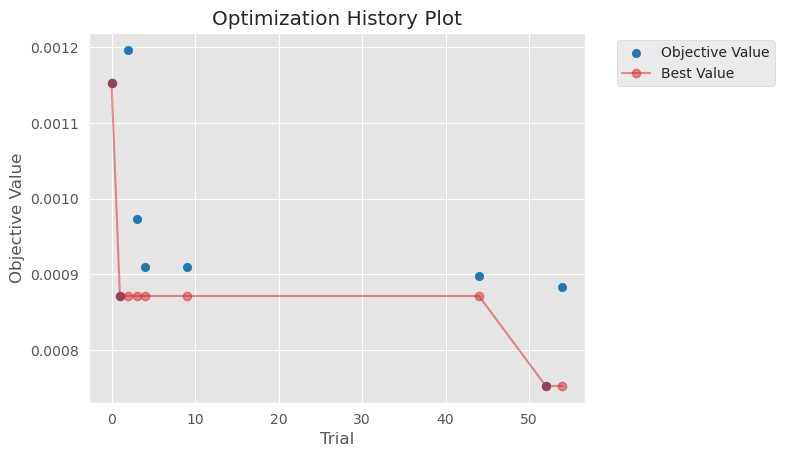

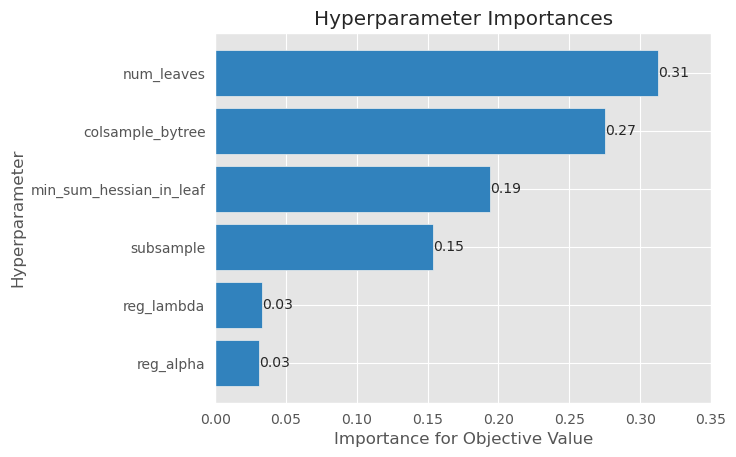

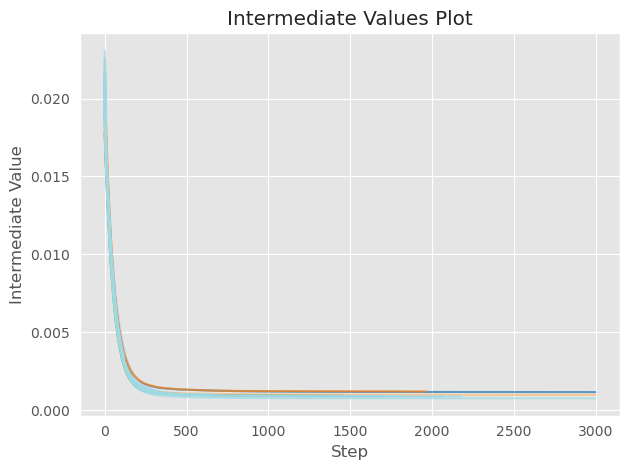

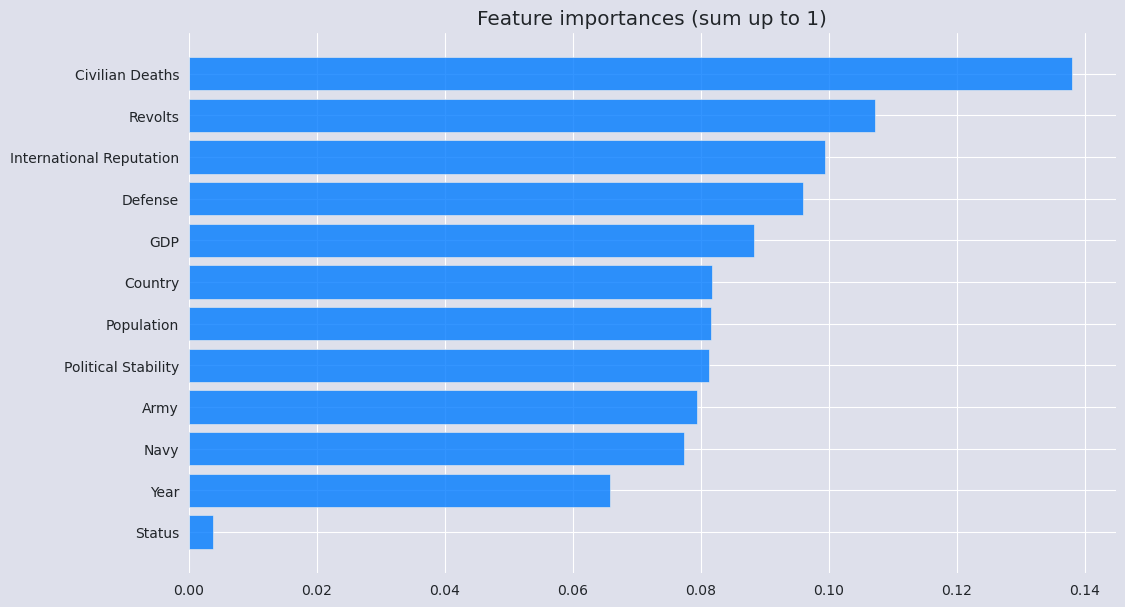


     . Optuna hyperparameters optimization finished
     .. Best trial number:52    |     mean_squared_error:        0.0007525494220000137
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration: 1202   |     mse:         0.001034637083838454

Time elapsed for fit execution: 3 min 41.193 sec


In [347]:
tuner = LGBMTuner(metric = 'mse')
tuner.fit(x_train1, y_train1)
     

In [348]:

pred = tuner.predict(x_test1)
    
mse(y_test1, pred)

0.0010330283831243292

In [349]:
r2_score(y_test1,pred)

0.9562223766511893

In [350]:
from sklearn.ensemble import ExtraTreesRegressor

In [351]:
et= ExtraTreesRegressor()

In [352]:
et.fit(x_train1,y_train1)

ExtraTreesRegressor()

In [353]:
pred2 = et.predict(x_test1)
    
mse(y_test1, pred2)

0.0009020130937225163

In [354]:
r2_score(y_test1,pred2)

0.9617745358038944

In [355]:
predtest=0.2*tuner.predict(x_test1)+0.8*et.predict(x_test1)

In [356]:
mse(y_test1, predtest)

0.0008949199945788905

In [357]:
r2_score(y_test1,predtest)

0.9620751267922526

In [358]:
test=pd.read_csv('/kaggle/input/country-military-dataset/Test_Dataset.csv')

In [359]:
test

,Country,Year,Status,Civilian Deaths,Military Accidents,Military Investment,Air Force,Army,Intelligence,Navy,Submarines,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,Afghanistan,2023,Developing,264,61,71.59,69.0,1153,18.28,84,8,68,0.65,583.49,33736494.0,17.50,16.52,1.33,9.68
1,Albania,2023,Developing,75,2,364.95,98.0,-2,57.89,2,97,94,-0.88,3954.09,28873.0,1.43,1.58,1.81,14.35
2,Algeria,2023,Developing,20,21,-0.23,95.0,63,59.52,22,93,92,0.32,4132.55,39871526.0,5.97,5.76,0.25,13.24
3,Angola,2023,Developing,337,65,-0.11,58.0,117,23.71,102,9,63,1.44,3696.01,2785939.0,7.46,8.82,0.04,10.25
4,Antigua and Barbuda,2023,Developing,9,-6,-0.67,98.0,1,47.73,1,95,100,0.68,13567.04,NaN,3.53,3.16,1.18,14.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2023,Developing,156,10,-0.03,87.0,-3,62.08,12,88,88,0.82,NaN,NaN,1.06,1.07,0.04,14.52
179,Viet Nam,2023,Developing,128,28,0.03,98.0,261,17.27,33,99,94,-0.19,NaN,NaN,14.00,14.87,-0.21,13.09
180,Yemen,2023,Developing,221,39,0.32,67.0,469,40.77,46,64,75,-0.26,NaN,NaN,13.46,13.32,0.76,8.74
181,Zambia,2023,Developing,35,24,-0.22,12.0,13,23.61,41,8,15,3.66,1313.08,161586.0,6.17,5.99,-0.30,12.46


In [360]:
test.isnull().sum()

Country                      0
Year                         0
Status                       0
Civilian Deaths              0
Military Accidents           0
Military Investment          0
Air Force                    9
Army                         0
Intelligence                 2
Navy                         0
Submarines                   0
Literacy                     0
Revolts                      0
GDP                         29
Population                  41
Offense                      2
Defense                      2
Political Stability         10
International Reputation    10
dtype: int64

In [361]:
test.columns

Index(['Country', 'Year', 'Status', 'Civilian Deaths', 'Military Accidents',
       'Military Investment', 'Air Force', 'Army', 'Intelligence', 'Navy',
       'Submarines', 'Literacy', 'Revolts', 'GDP', 'Population', 'Offense',
       'Defense', 'Political Stability', 'International Reputation'],
      dtype='object')

In [362]:
num_cols = [ 'Civilian Deaths', 'Military Accidents',
       'Military Investment', 'Air Force', 'Army', 'Intelligence', 'Navy',
       'Submarines', 'Literacy', 'Revolts', 'GDP', 'Population', 'Offense',
       'Defense', 'Political Stability', 'International Reputation']

num_data = test[num_cols]

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
num_data_imputed = imputer.fit_transform(num_data)

test[num_cols] = num_data_imputed

In [363]:
for country in test['Country'].unique():
    country_data = test[test['Country'] == country]
    for col in num_cols:
        mean_val = country_data[col].mean()
        for i in country_data.index:
            if country_data.at[i, col] < 0.2 * mean_val:
                country_data.at[i, col] = mean_val
    test[test['Country'] == country] = country_data

In [364]:
test=test.drop(['Military Investment','Offense','Literacy','Air Force','Submarines'],axis=1)



In [365]:
for cols in {'Civilian Deaths','Defense','Political Stability'}:
    test[cols]=np.log1p(test[cols])
test["Status"] = np.where(test["Status"] == "Developing", 0, 1)
test['Country'] = le.fit_transform(test['Country'])

In [366]:
test

,Country,Year,Status,Civilian Deaths,Military Accidents,Army,Intelligence,Navy,Revolts,GDP,Population,Defense,Political Stability,International Reputation
0,0,2023,0,5.579730,61.0,1153.0,18.28,84.0,0.65,583.490,33736494.0,2.863343,0.845868,9.68
1,1,2023,0,4.330733,2.0,-2.0,57.89,2.0,-0.88,3954.090,28873.0,0.947789,1.033184,14.35
2,2,2023,0,3.044522,21.0,63.0,59.52,22.0,0.32,4132.550,39871526.0,1.911023,0.223144,13.24
3,3,2023,0,5.823046,65.0,117.0,23.71,102.0,1.44,3696.010,2785939.0,2.284421,0.039221,10.25
4,4,2023,0,2.302585,-6.0,1.0,47.73,1.0,0.68,13567.040,17962558.4,1.425515,0.779325,14.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178,2023,0,5.056246,10.0,-3.0,62.08,12.0,0.82,6019.892,11961887.6,0.727549,0.039221,14.52
179,179,2023,0,4.859812,28.0,261.0,17.27,33.0,-0.19,13371.264,2714244.6,2.764431,-0.235722,13.09
180,180,2023,0,5.402677,39.0,469.0,40.77,46.0,-0.26,2126.832,3788115.8,2.661657,0.565314,8.74
181,181,2023,0,3.583519,24.0,13.0,23.61,41.0,3.66,1313.080,161586.0,1.944481,-0.356675,12.46


In [367]:
s_col={ 'Civilian Deaths',
        'Army', 'Navy', 'Revolts', 'GDP', 'Population',
       'Defense', 'Political Stability', 'International Reputation'}
scaled = scaler.fit_transform(test[s_col])
scaled=pd.DataFrame(scaled,columns=test[s_col].columns)

In [368]:
scaled['Country']=test['Country']
scaled['Year']=test['Year']
scaled['Status']=test['Status']

In [369]:
scaled

,Civilian Deaths,Army,GDP,Revolts,Political Stability,International Reputation,Population,Navy,Defense,Country,Year,Status
0,0.901963,0.012833,0.008306,0.205400,0.890652,0.340694,0.130669,0.082278,0.868884,0,2023,0
1,0.700063,0.000055,0.059133,0.057859,0.964050,0.635331,0.000100,0.008137,0.334020,1,2023,0
2,0.492147,0.000774,0.061824,0.173578,0.646642,0.565300,0.154434,0.026221,0.602975,2,2023,0
3,0.941295,0.001372,0.055242,0.281581,0.574573,0.376656,0.010780,0.098553,0.707236,3,2023,0
4,0.372213,0.000089,0.204094,0.208293,0.864577,0.628391,0.069568,0.007233,0.467411,4,2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.817342,0.000044,0.090285,0.221794,0.574573,0.646057,0.046324,0.017179,0.272523,178,2023,0
179,0.785588,0.002965,0.201141,0.124397,0.466839,0.555836,0.010502,0.036166,0.841266,179,2023,0
180,0.873342,0.005266,0.031579,0.117647,0.780719,0.281388,0.014662,0.047920,0.812569,180,2023,0
181,0.579275,0.000221,0.019308,0.495661,0.419444,0.516088,0.000614,0.043400,0.612318,181,2023,0


In [393]:
pred11= tuner.predict(scaled)

In [394]:
pred22 = et.predict(scaled)

In [395]:
fin_pred=0.2*pred11+0.8*pred22

In [396]:
fin_pred= np.e**fin_pred - 1

In [397]:
fin_pred=pd.DataFrame(fin_pred)


In [398]:
fin_pred.columns=['Predictions']

In [399]:
fin_pred['Countries']=scaled['Country']

In [400]:
fin_pred

,Predictions,Countries
0,50.617181,0
1,70.577426,1
2,64.382468,2
3,48.709854,3
4,67.663044,4
...,...,...
178,61.073298,178
179,61.337376,179
180,55.746665,180
181,58.104196,181


In [403]:
fin_pred=fin_pred['Predictions'].round(2)


In [404]:
fin_pred

0      50.62
1      70.58
2      64.38
3      48.71
4      67.66
       ...  
178    61.07
179    61.34
180    55.75
181    58.10
182    47.98
Name: Predictions, Length: 183, dtype: float64

In [405]:
fin_pred.to_csv('sub1.csv')